In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: P0934201001M1U005SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.594e-03 +/- 1.040e-03 (61.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-9
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.32e+04 sec
 Using fit statistic: chi
 Using Background File                P0934201001M1U005BGSPEC0002.FTZ
  Background Exposure Time: 1.32e+04 sec
 Using Response (RMF) File            m1_e13_im_pall_o.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0934201001M1U005SRCARF0002.FTZ



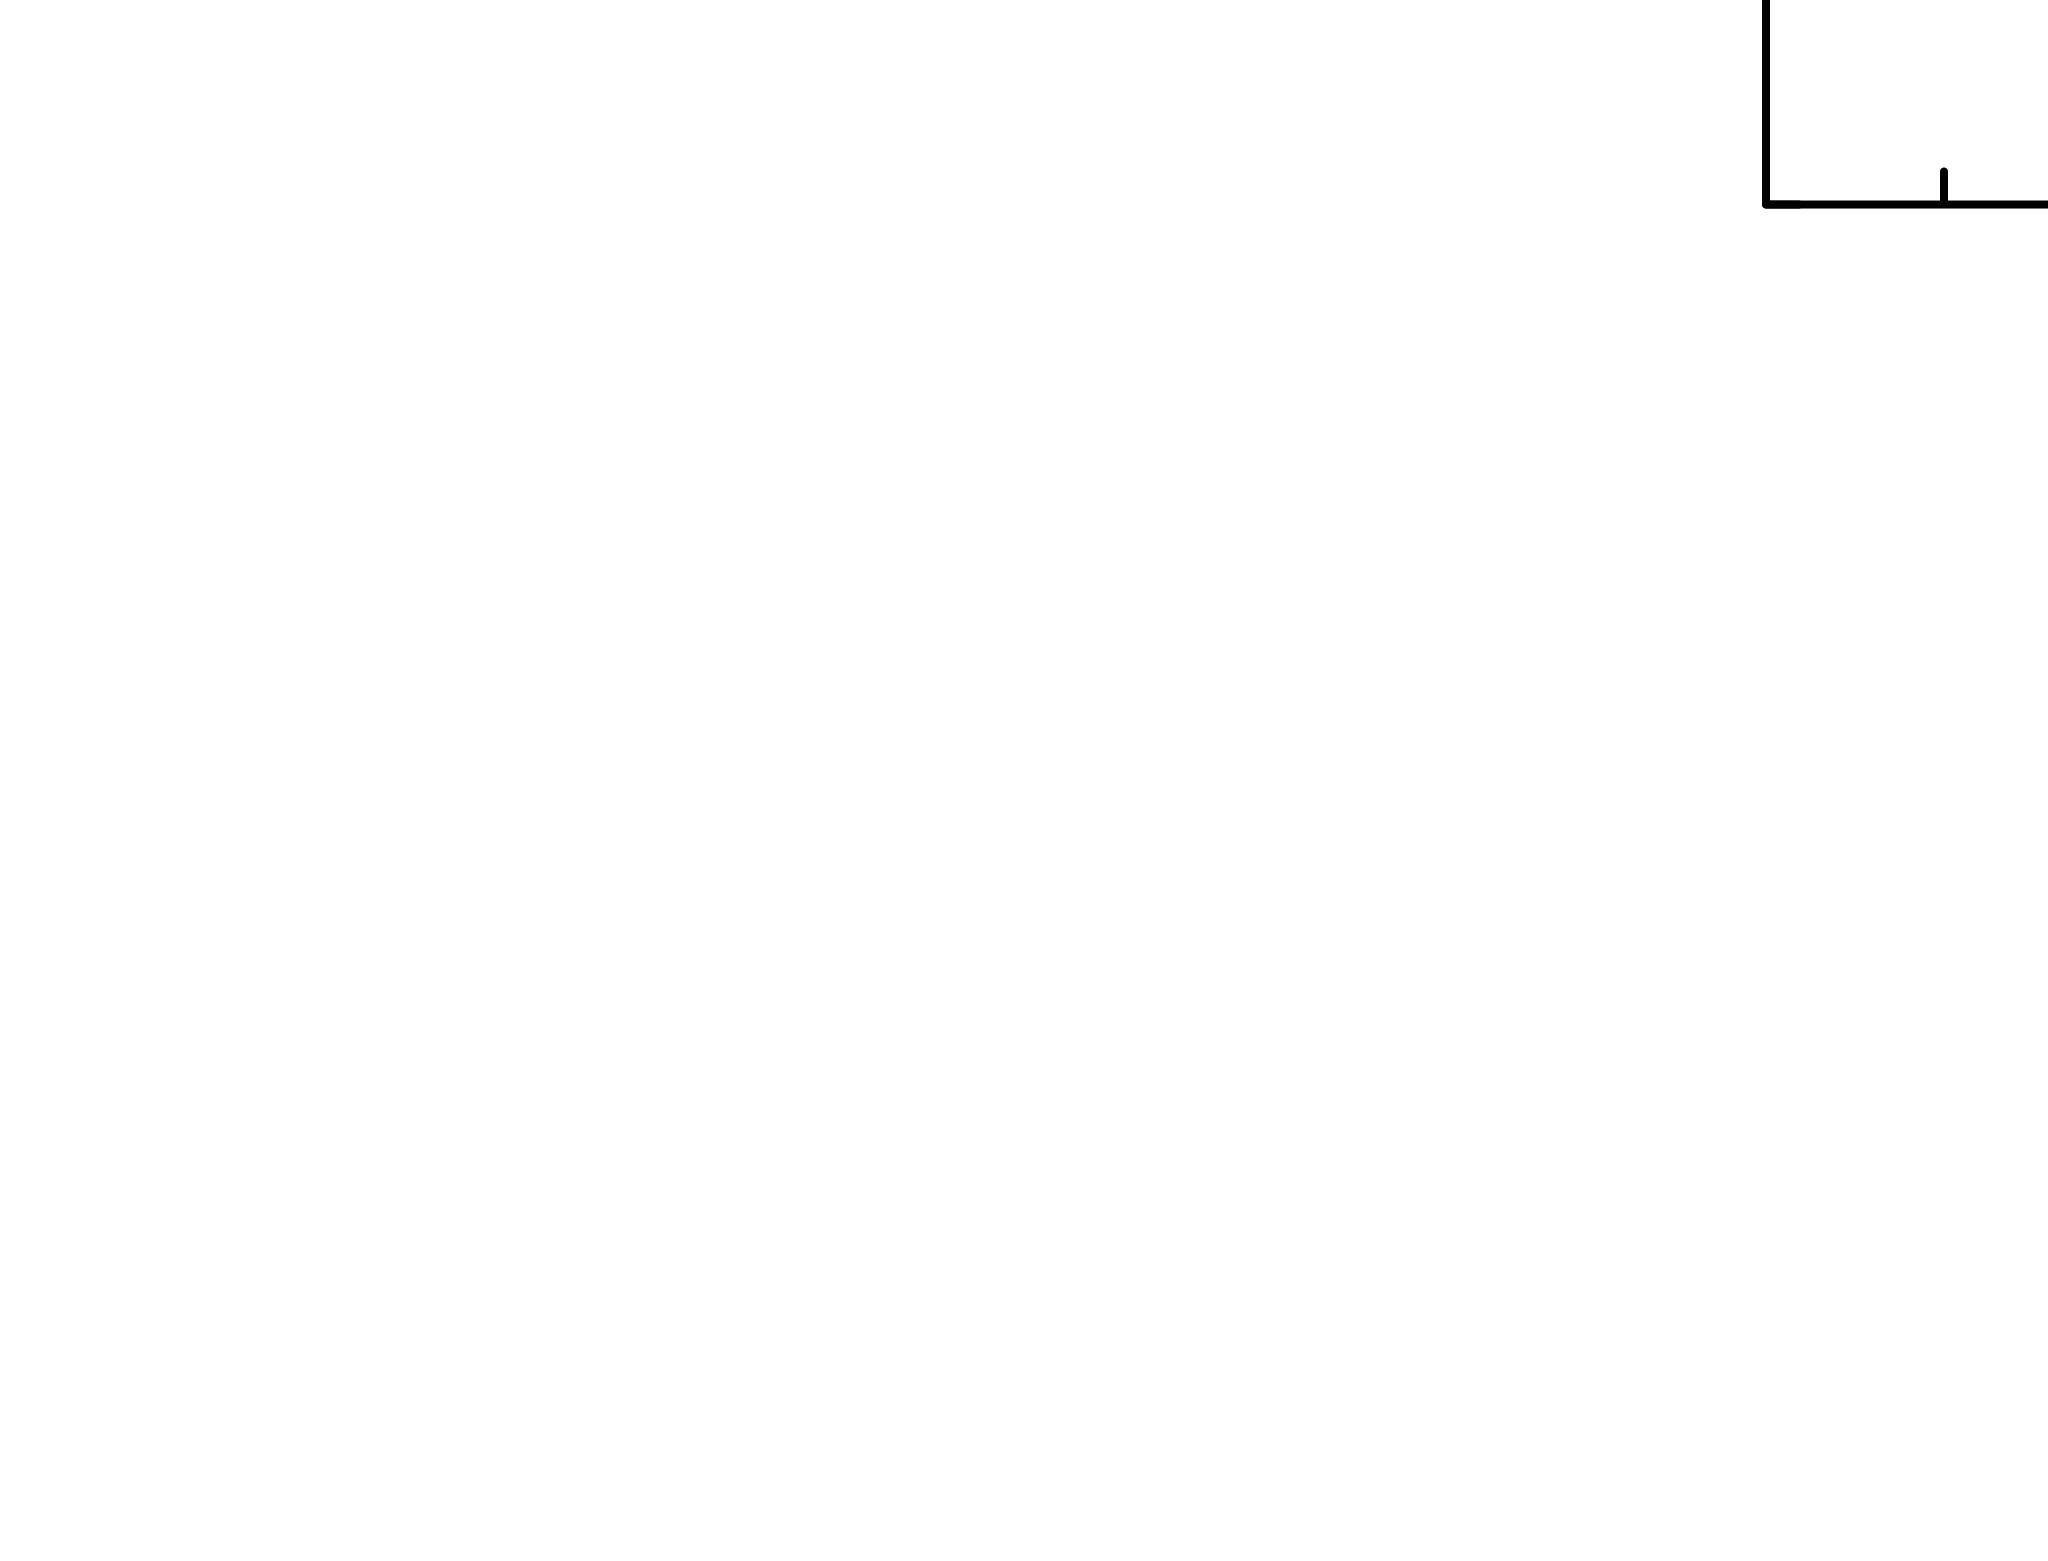

In [3]:
spec_fnames = glob.glob('P*M1U*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00002 0.02")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (9) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

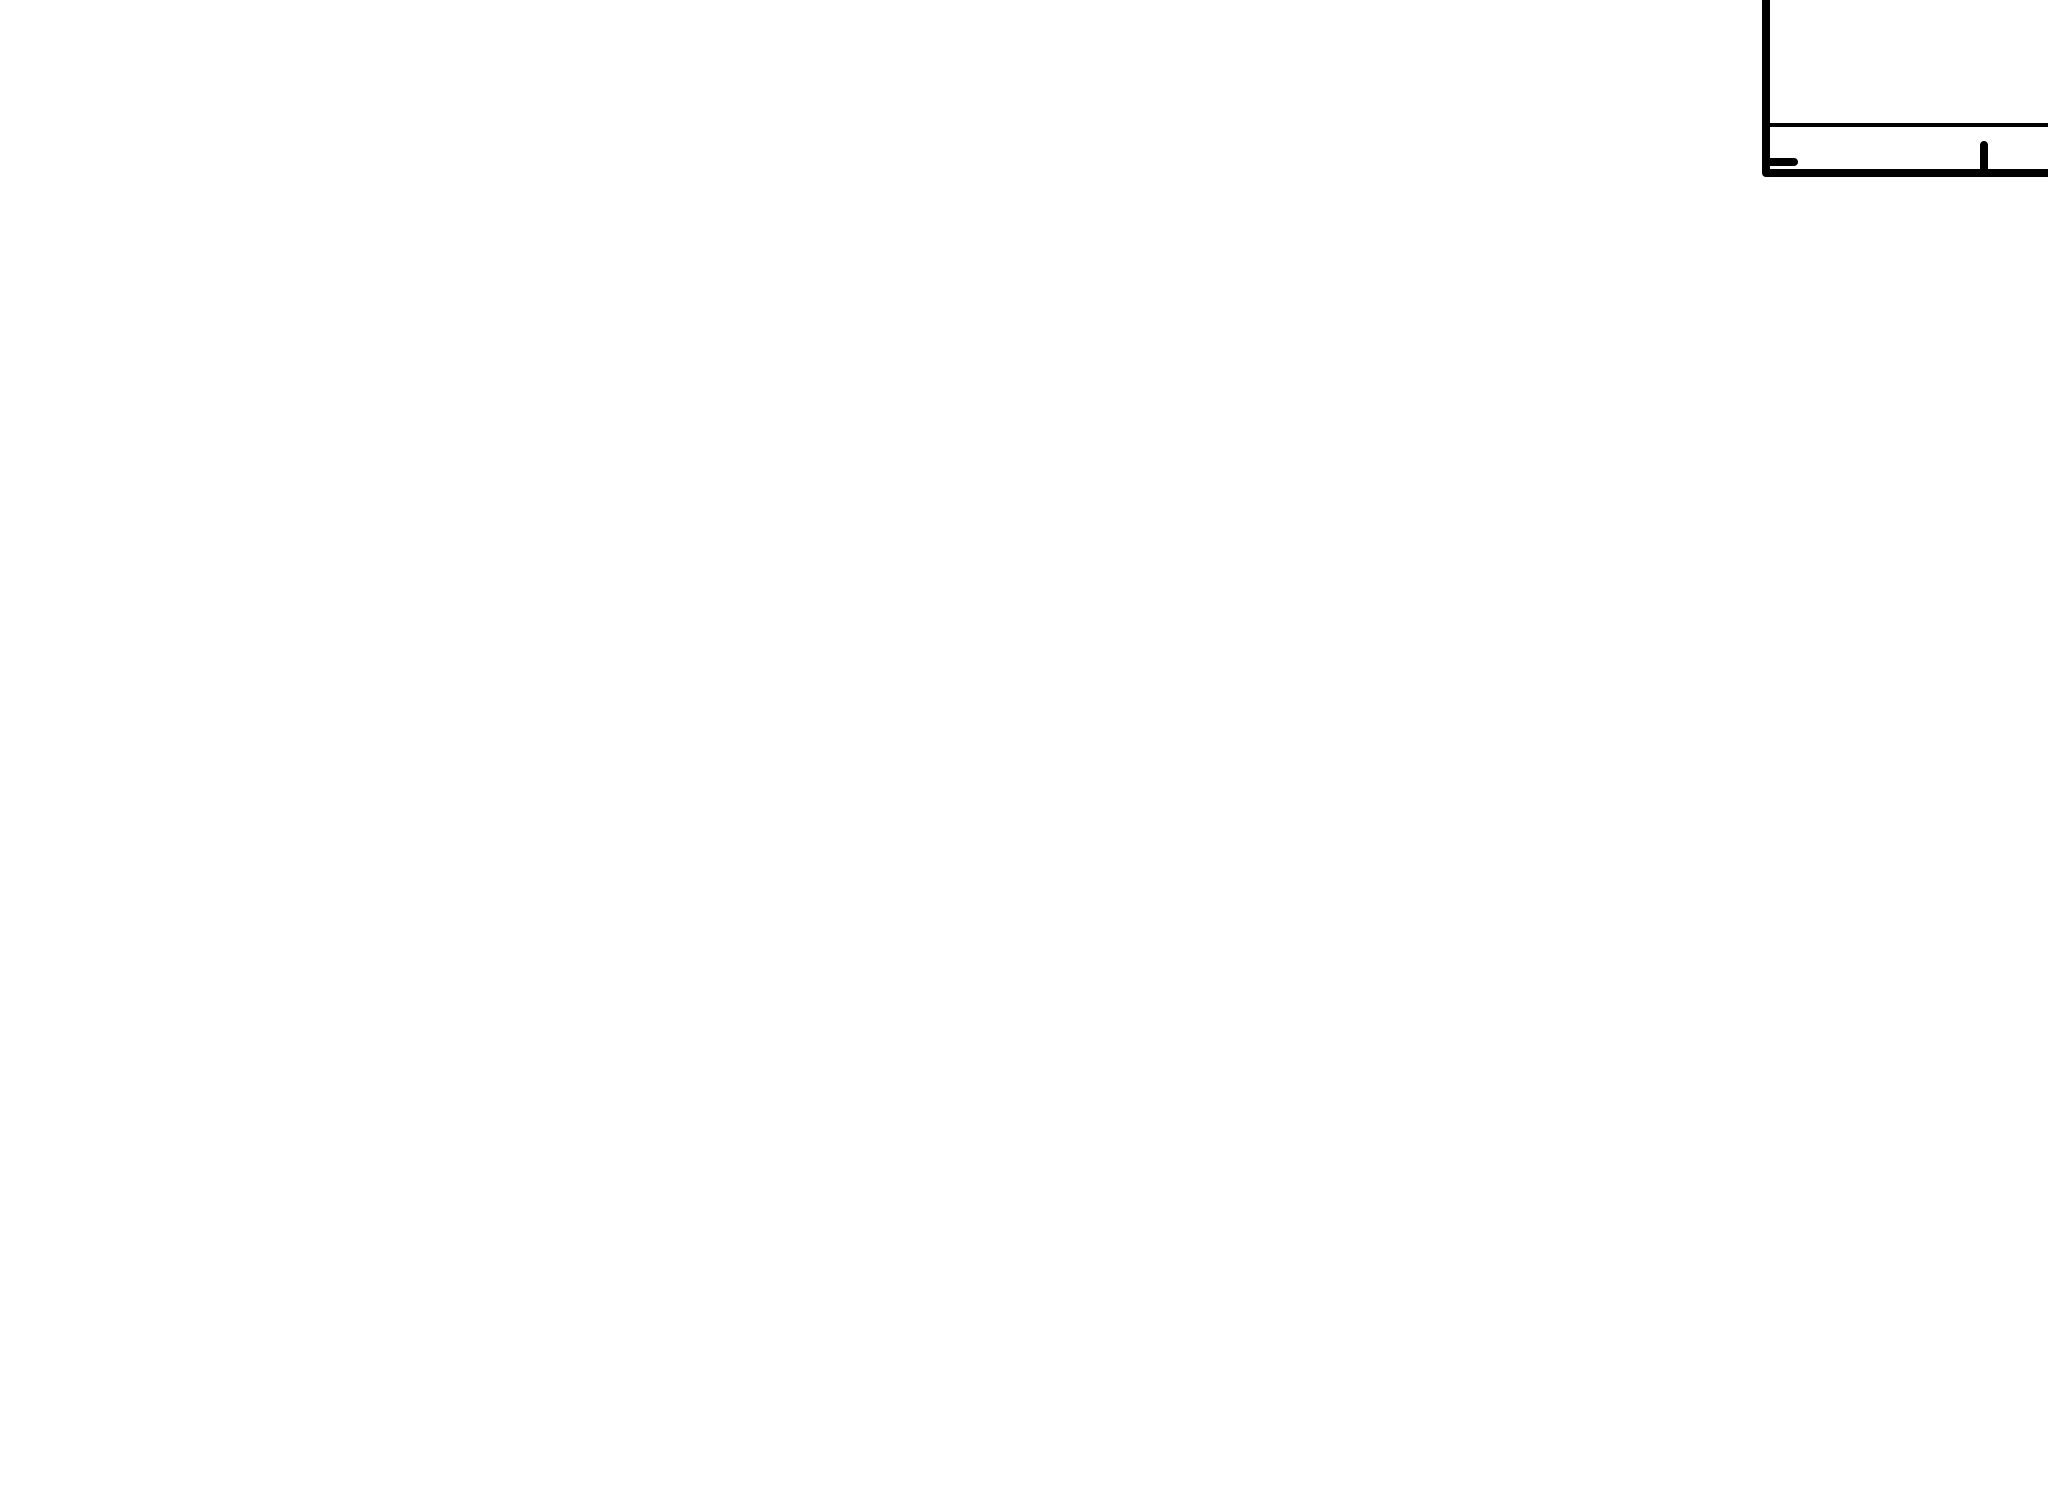

In [4]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      2.50071      7.89656    (-2.00928,3.38657)
 Parameter   Confidence Range (2.706)
     2     0.495553     0.874188    (-0.167831,0.210804)



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.216524e+10     using 8 bins.

Test statistic : Chi-Squared              5.216524e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
20.5391      4.09133      -1       1.91355       1.07570   4.41056e-05
18.4358      30890.9      -1       2.29365       1.28546   6.07569e-05
16.3306      32201.2      -1       2.51232       1.47693   8.26856e-05
1

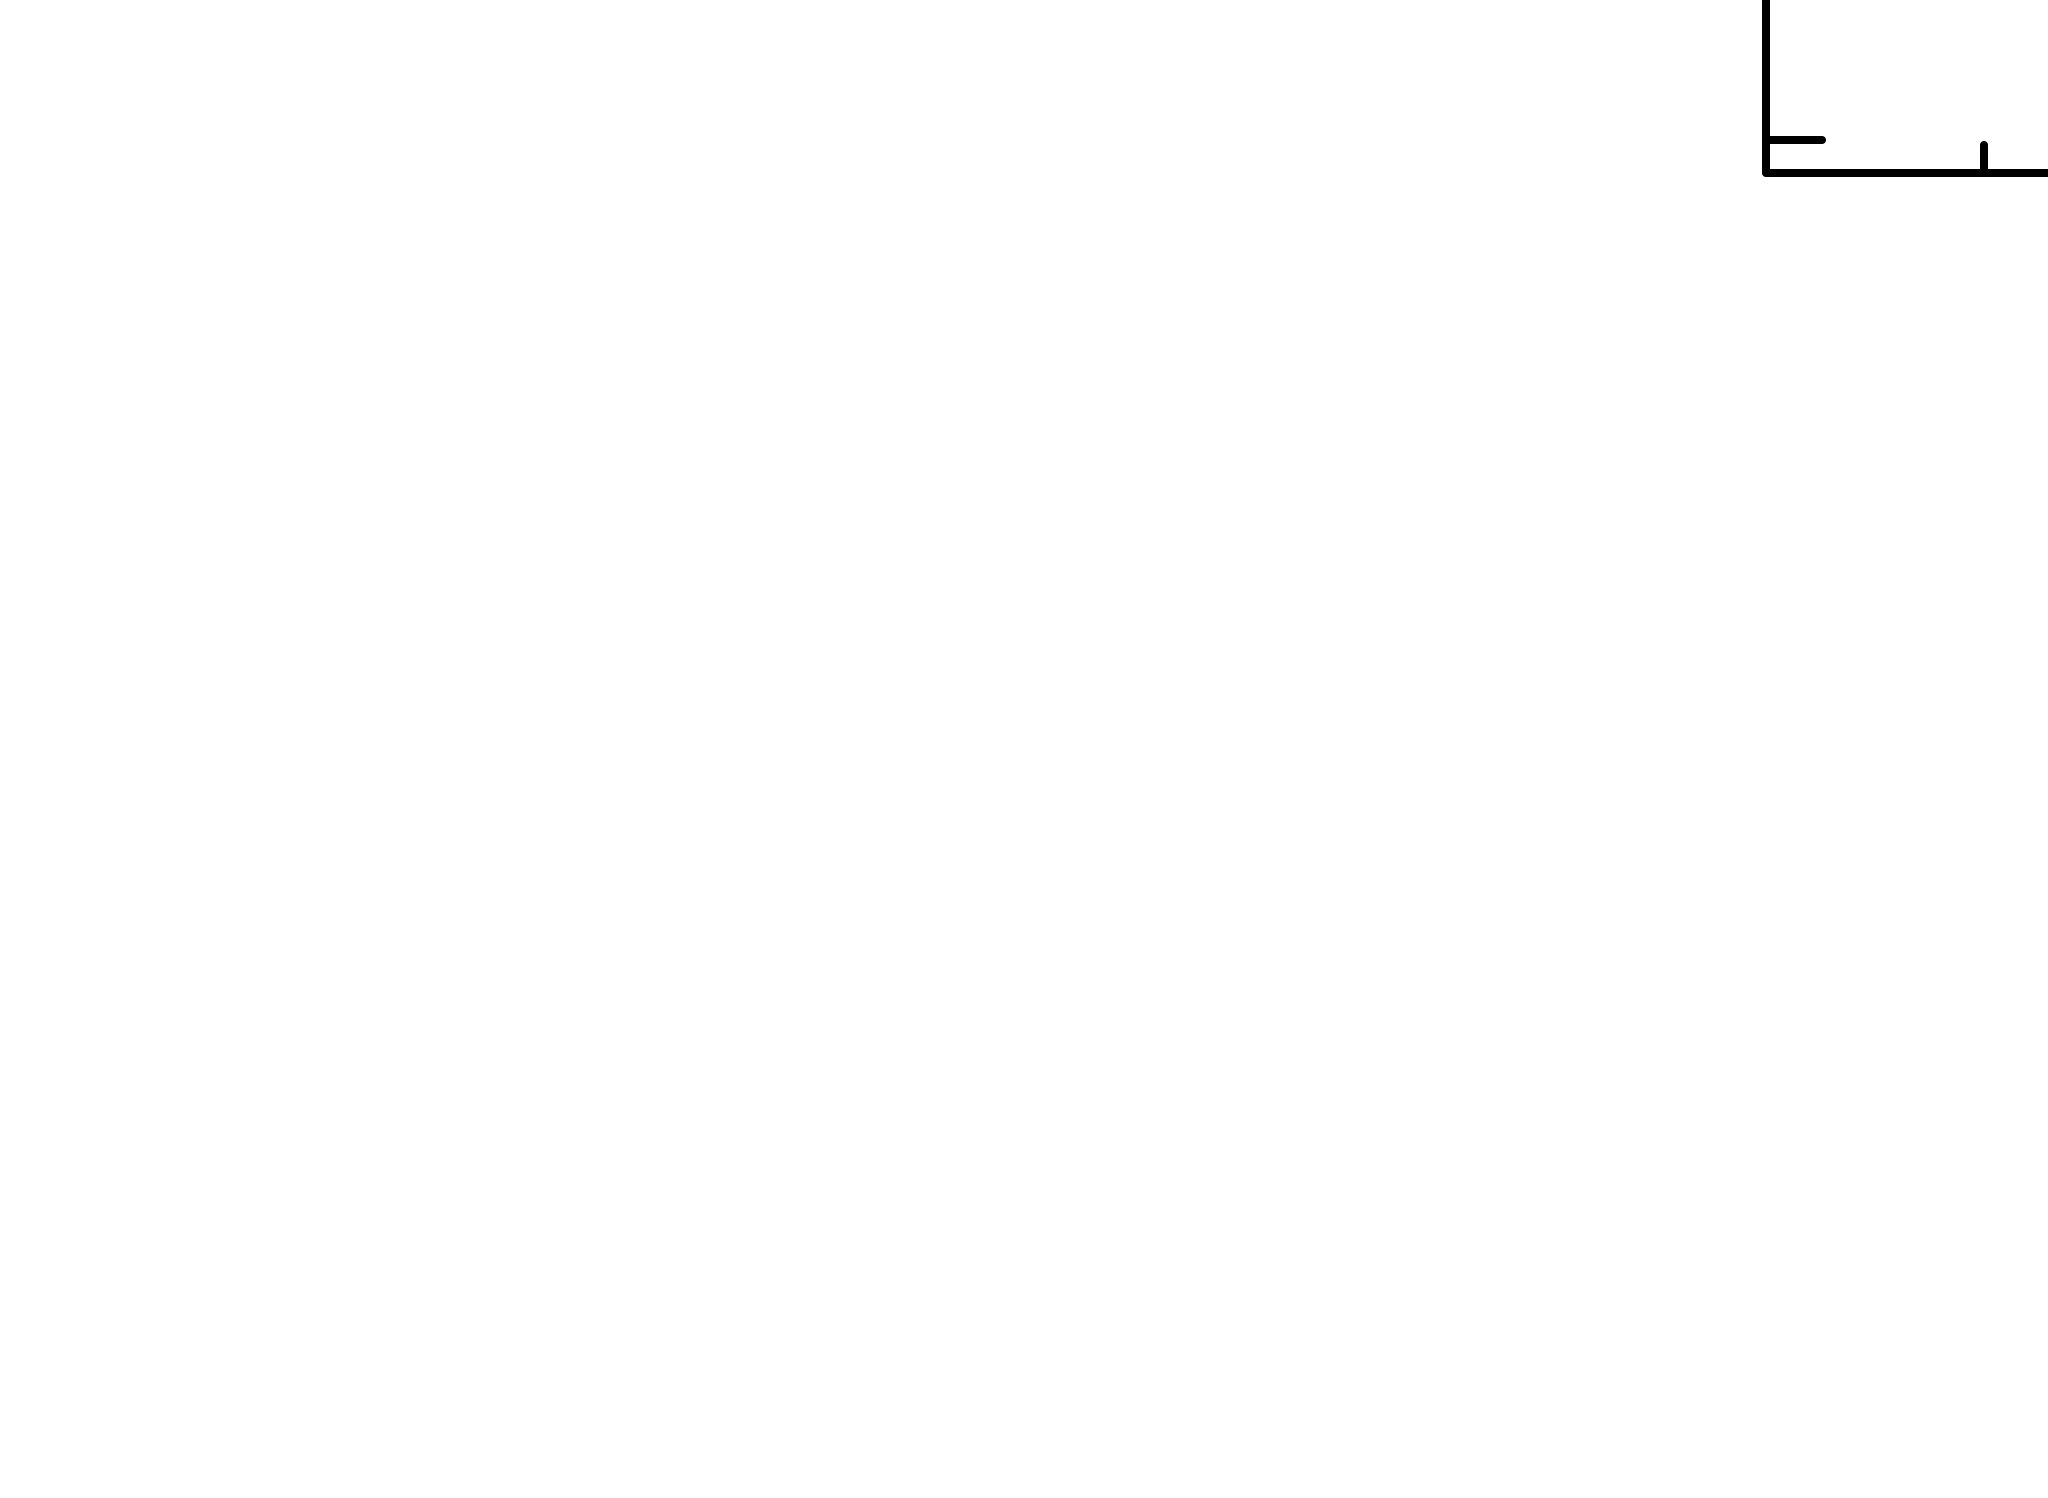

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      4.91301       13.474    (-3.26149,5.29946)
 Parameter   Confidence Range (2.706)
     2      2.99919      6.77247    (-1.56766,2.20563)


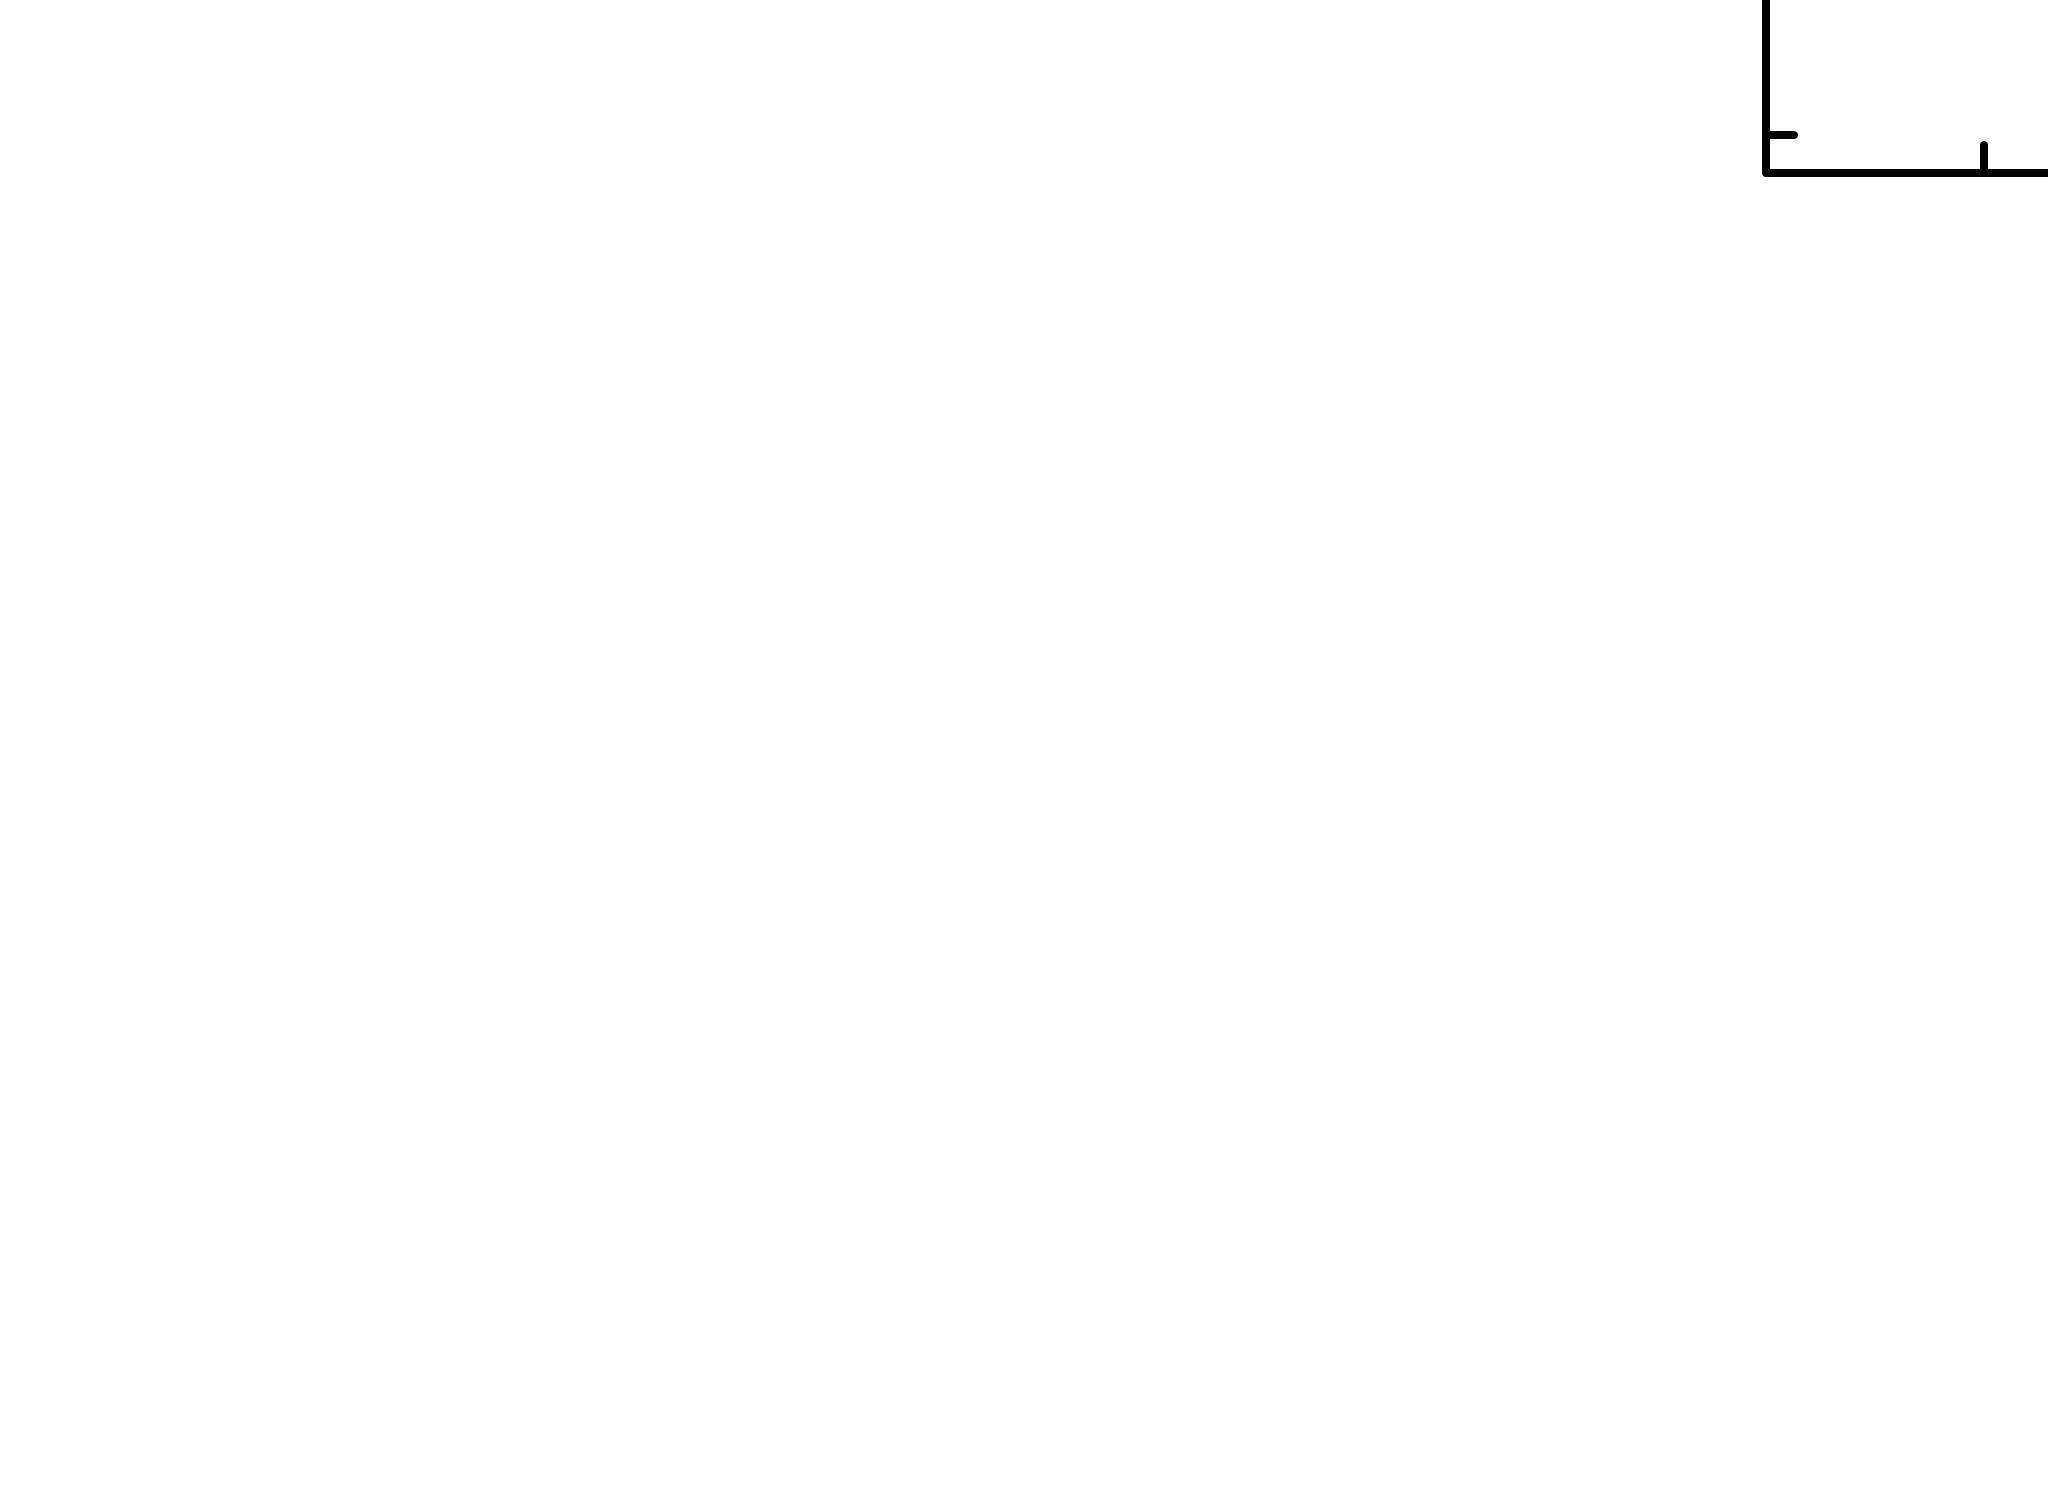


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.061730e+10     using 8 bins.

Test statistic : Chi-Squared              1.061730e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
31.4968      6.09976      -2       3.05235       2.35441   0.000150292
8.76669      38281.2      -1       4.51275       3.71775   0.000292658
6.35045      1568.72      -1       3.80121       2.58231   0.000336104
4.6

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      3.99218      9.95188    (-2.29588,3.66382)
 Parameter   Confidence Range (2.706)
     2     0.815662       2.6502    (-0.550509,1.28403)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.842223e+09     using 8 bins.

Test statistic : Chi-Squared              4.842223e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
78.0331      1.20657      -3      0.315088       47.9060   5.5

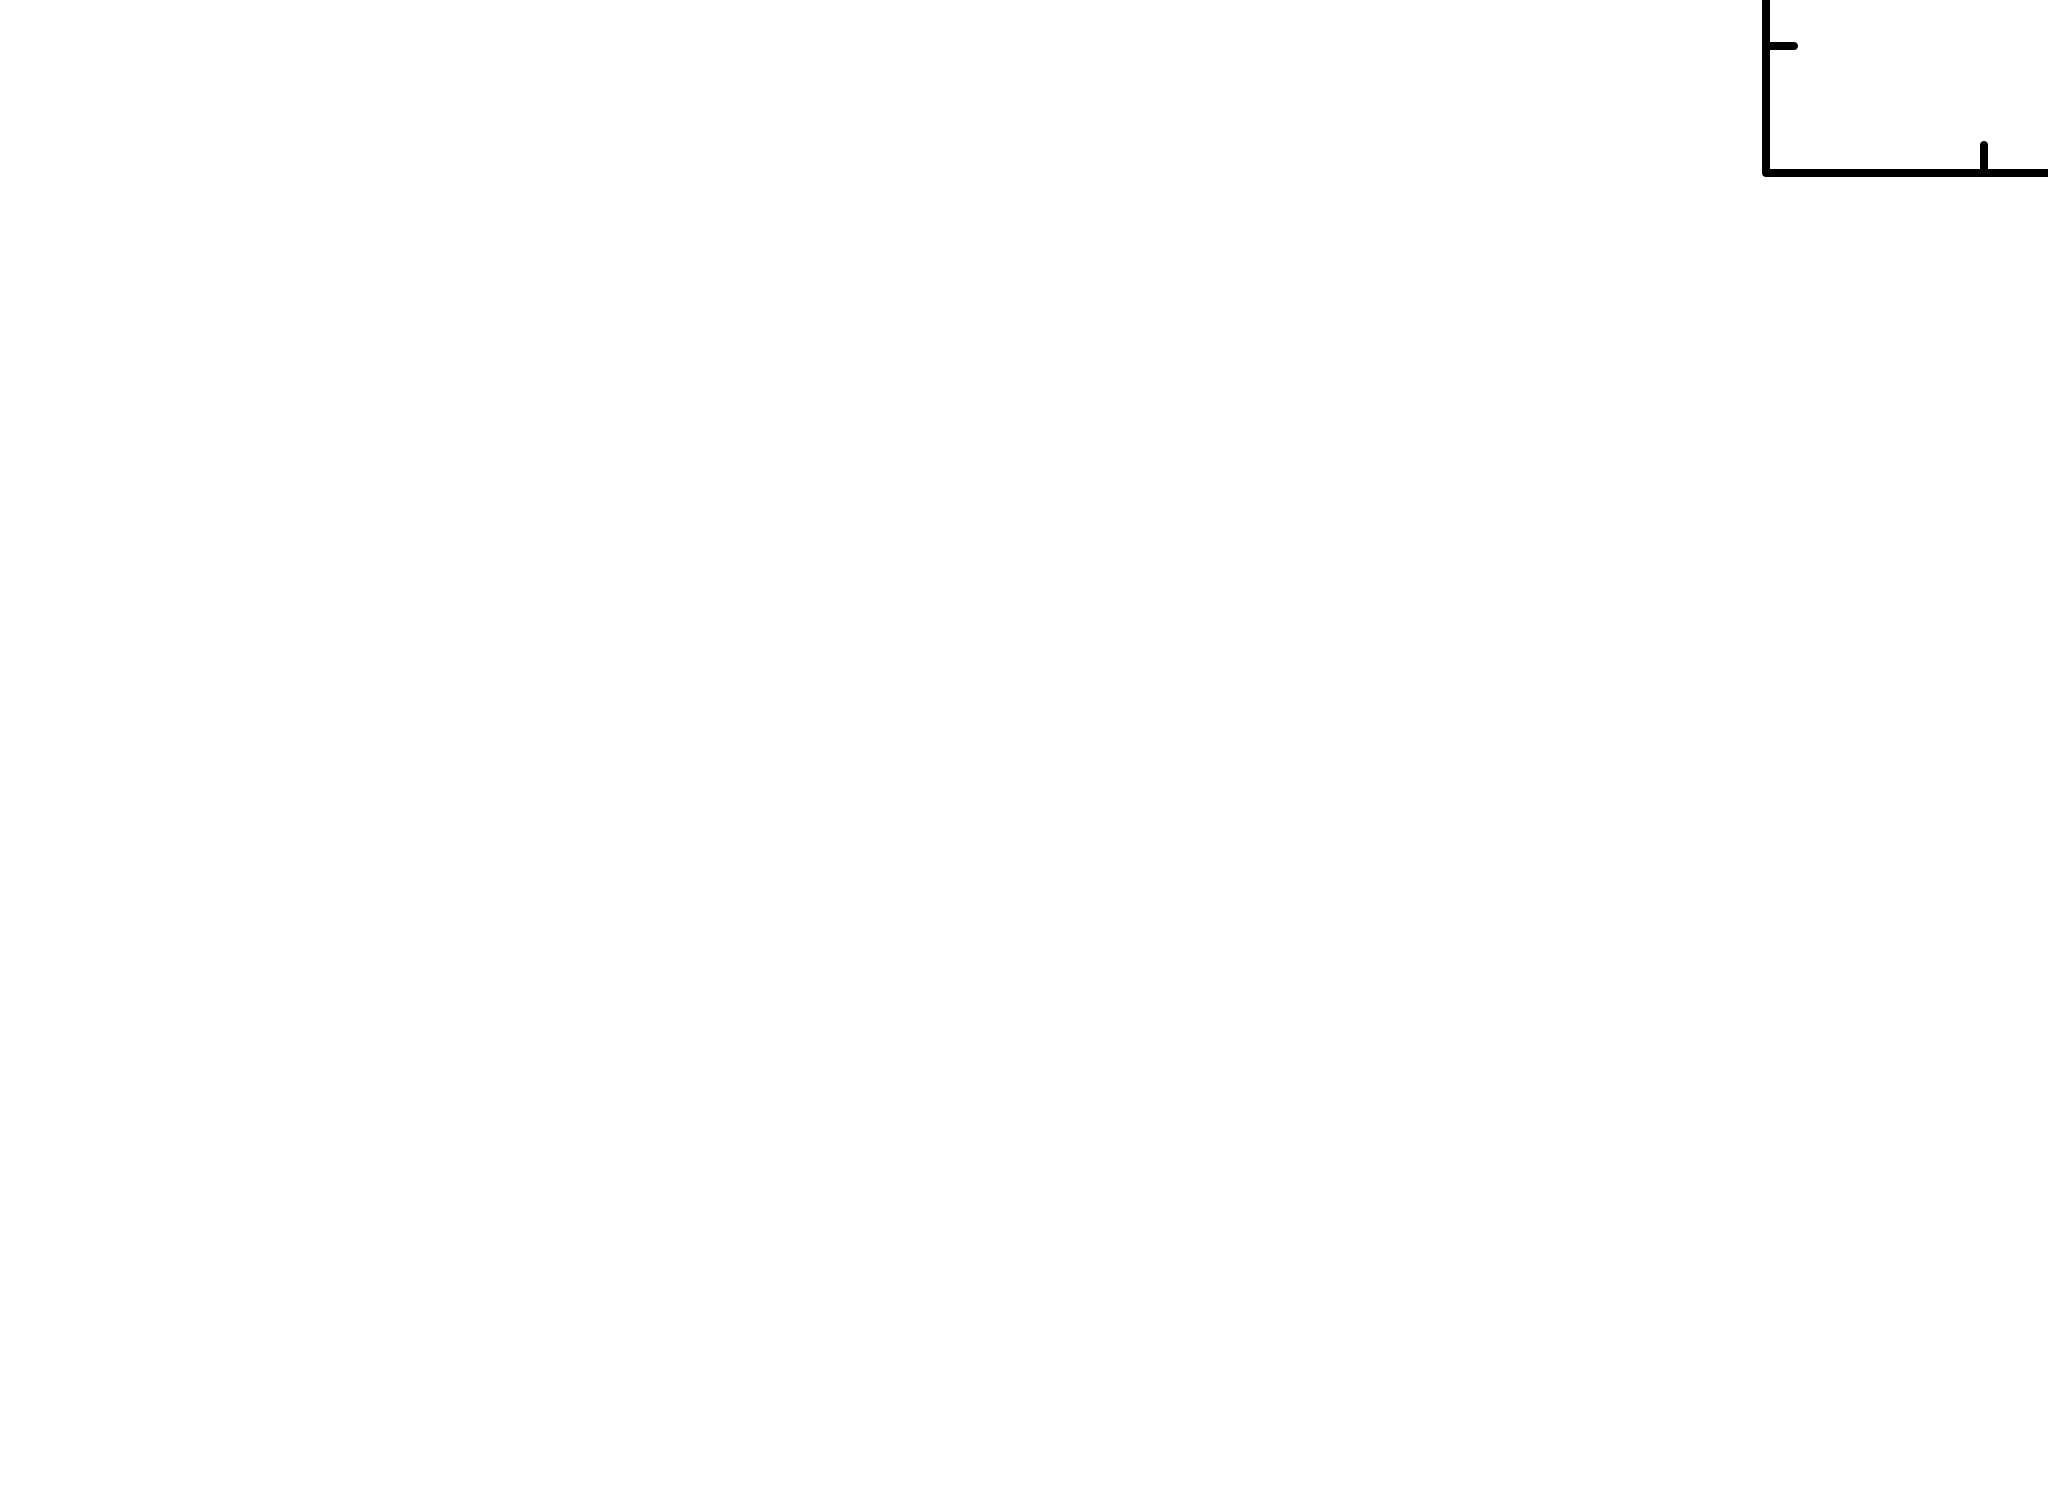

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      3.85481      10.7291    (-2.25172,4.62259)
 Parameter   Confidence Range (2.706)
     2     0.882972      2.88782    (-0.733068,1.27178)


In [12]:
np.savetxt('../spec67_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 5.4975e-05 photons (3.2664e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
#plx = 1.4843
d_kpc = 8
F_x = 3.7888*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.900435002405684e+33


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.46246313754613


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.8373123816368683


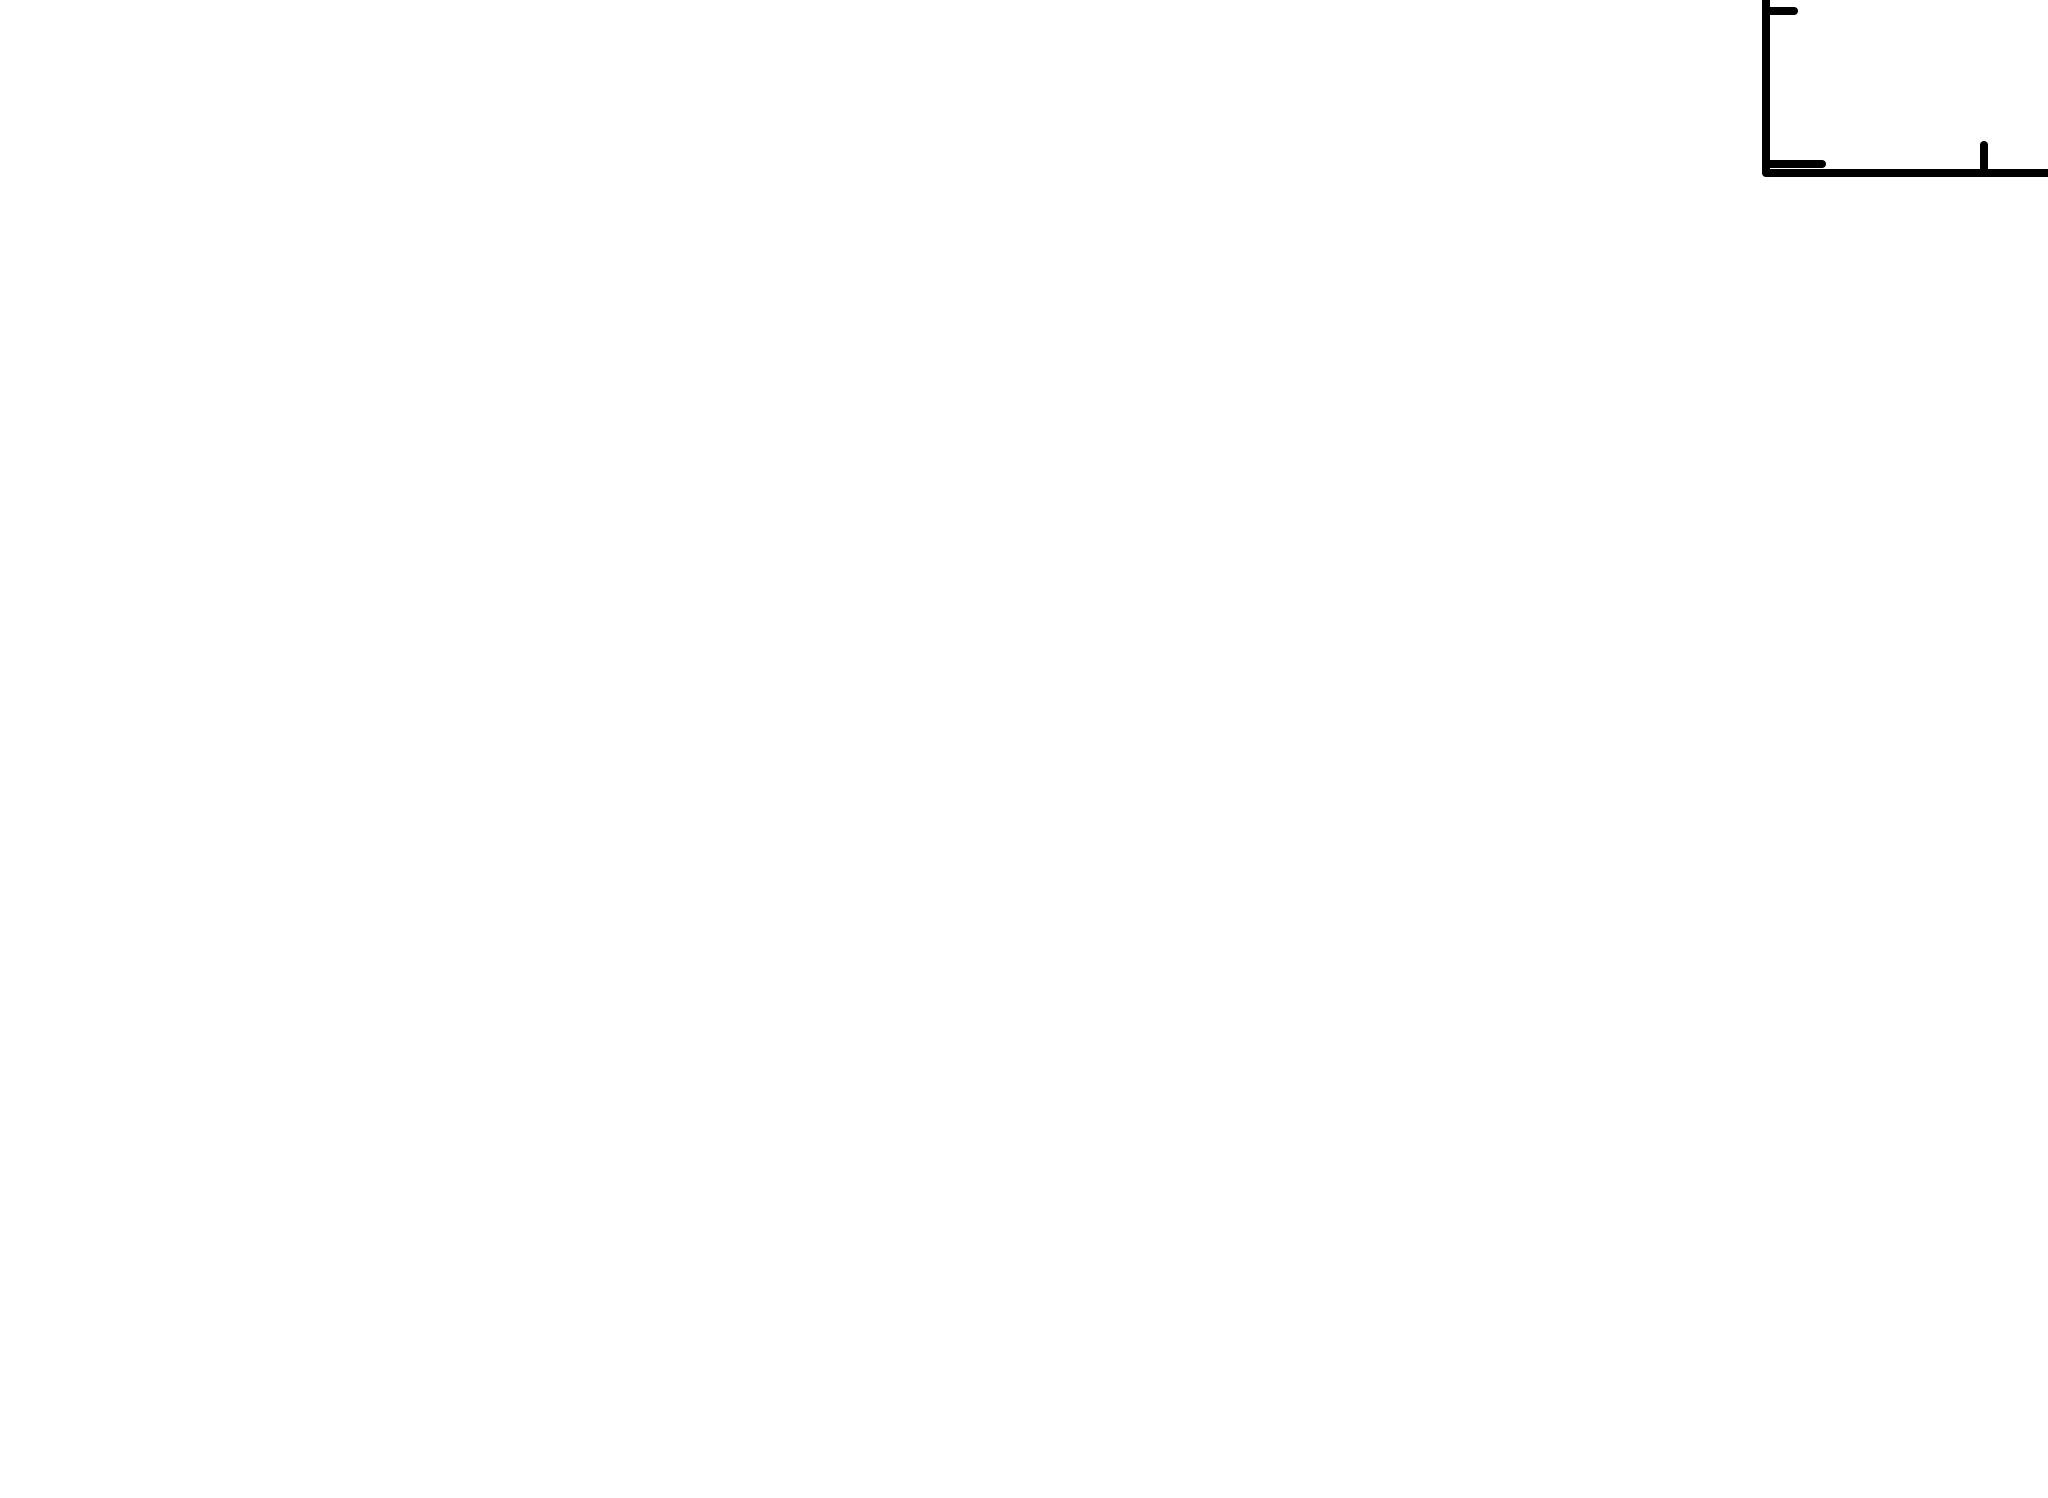


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.157958e+09     using 8 bins.

Test statistic : Chi-Squared              3.157958e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.270122e+08     using 8 bins.

Test statistic : Chi-Squared              6.270122e+08     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degree

In [17]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.842223e+09     using 8 bins.

Test statistic : Chi-Squared              4.842223e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              8.632364e+08     using 8 bins.

Test statistic : Chi-Squared              8.632364e+08     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees o

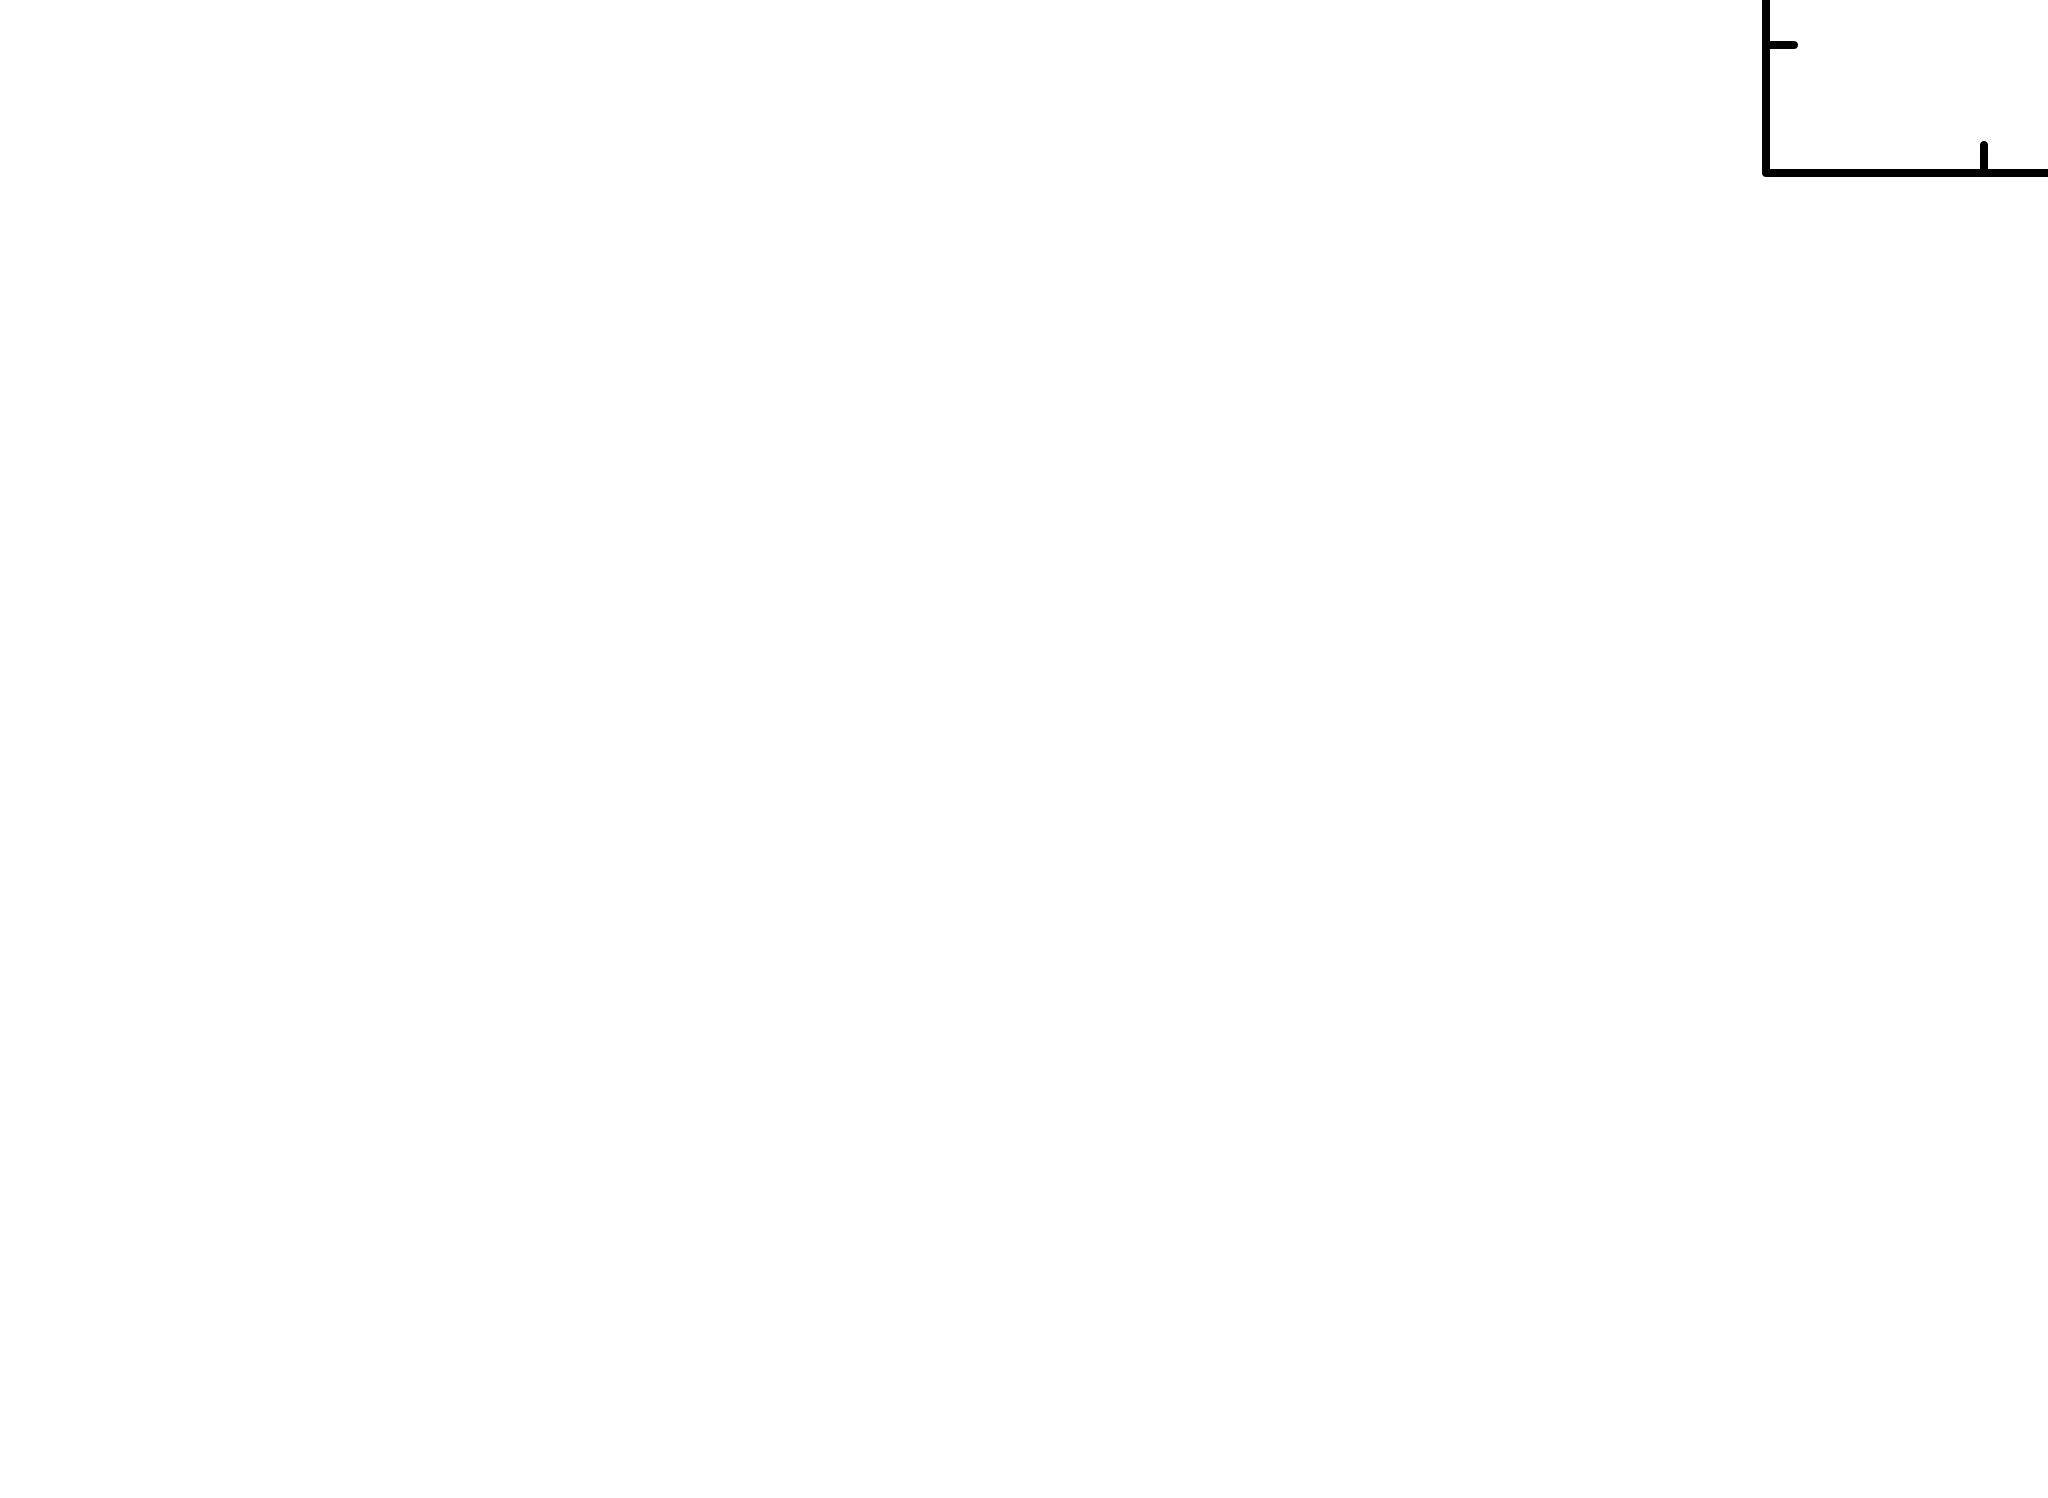

In [18]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.936928e+10     using 8 bins.

Test statistic : Chi-Squared              1.936928e+10     using 8 bins.
 Null hypothesis probability o

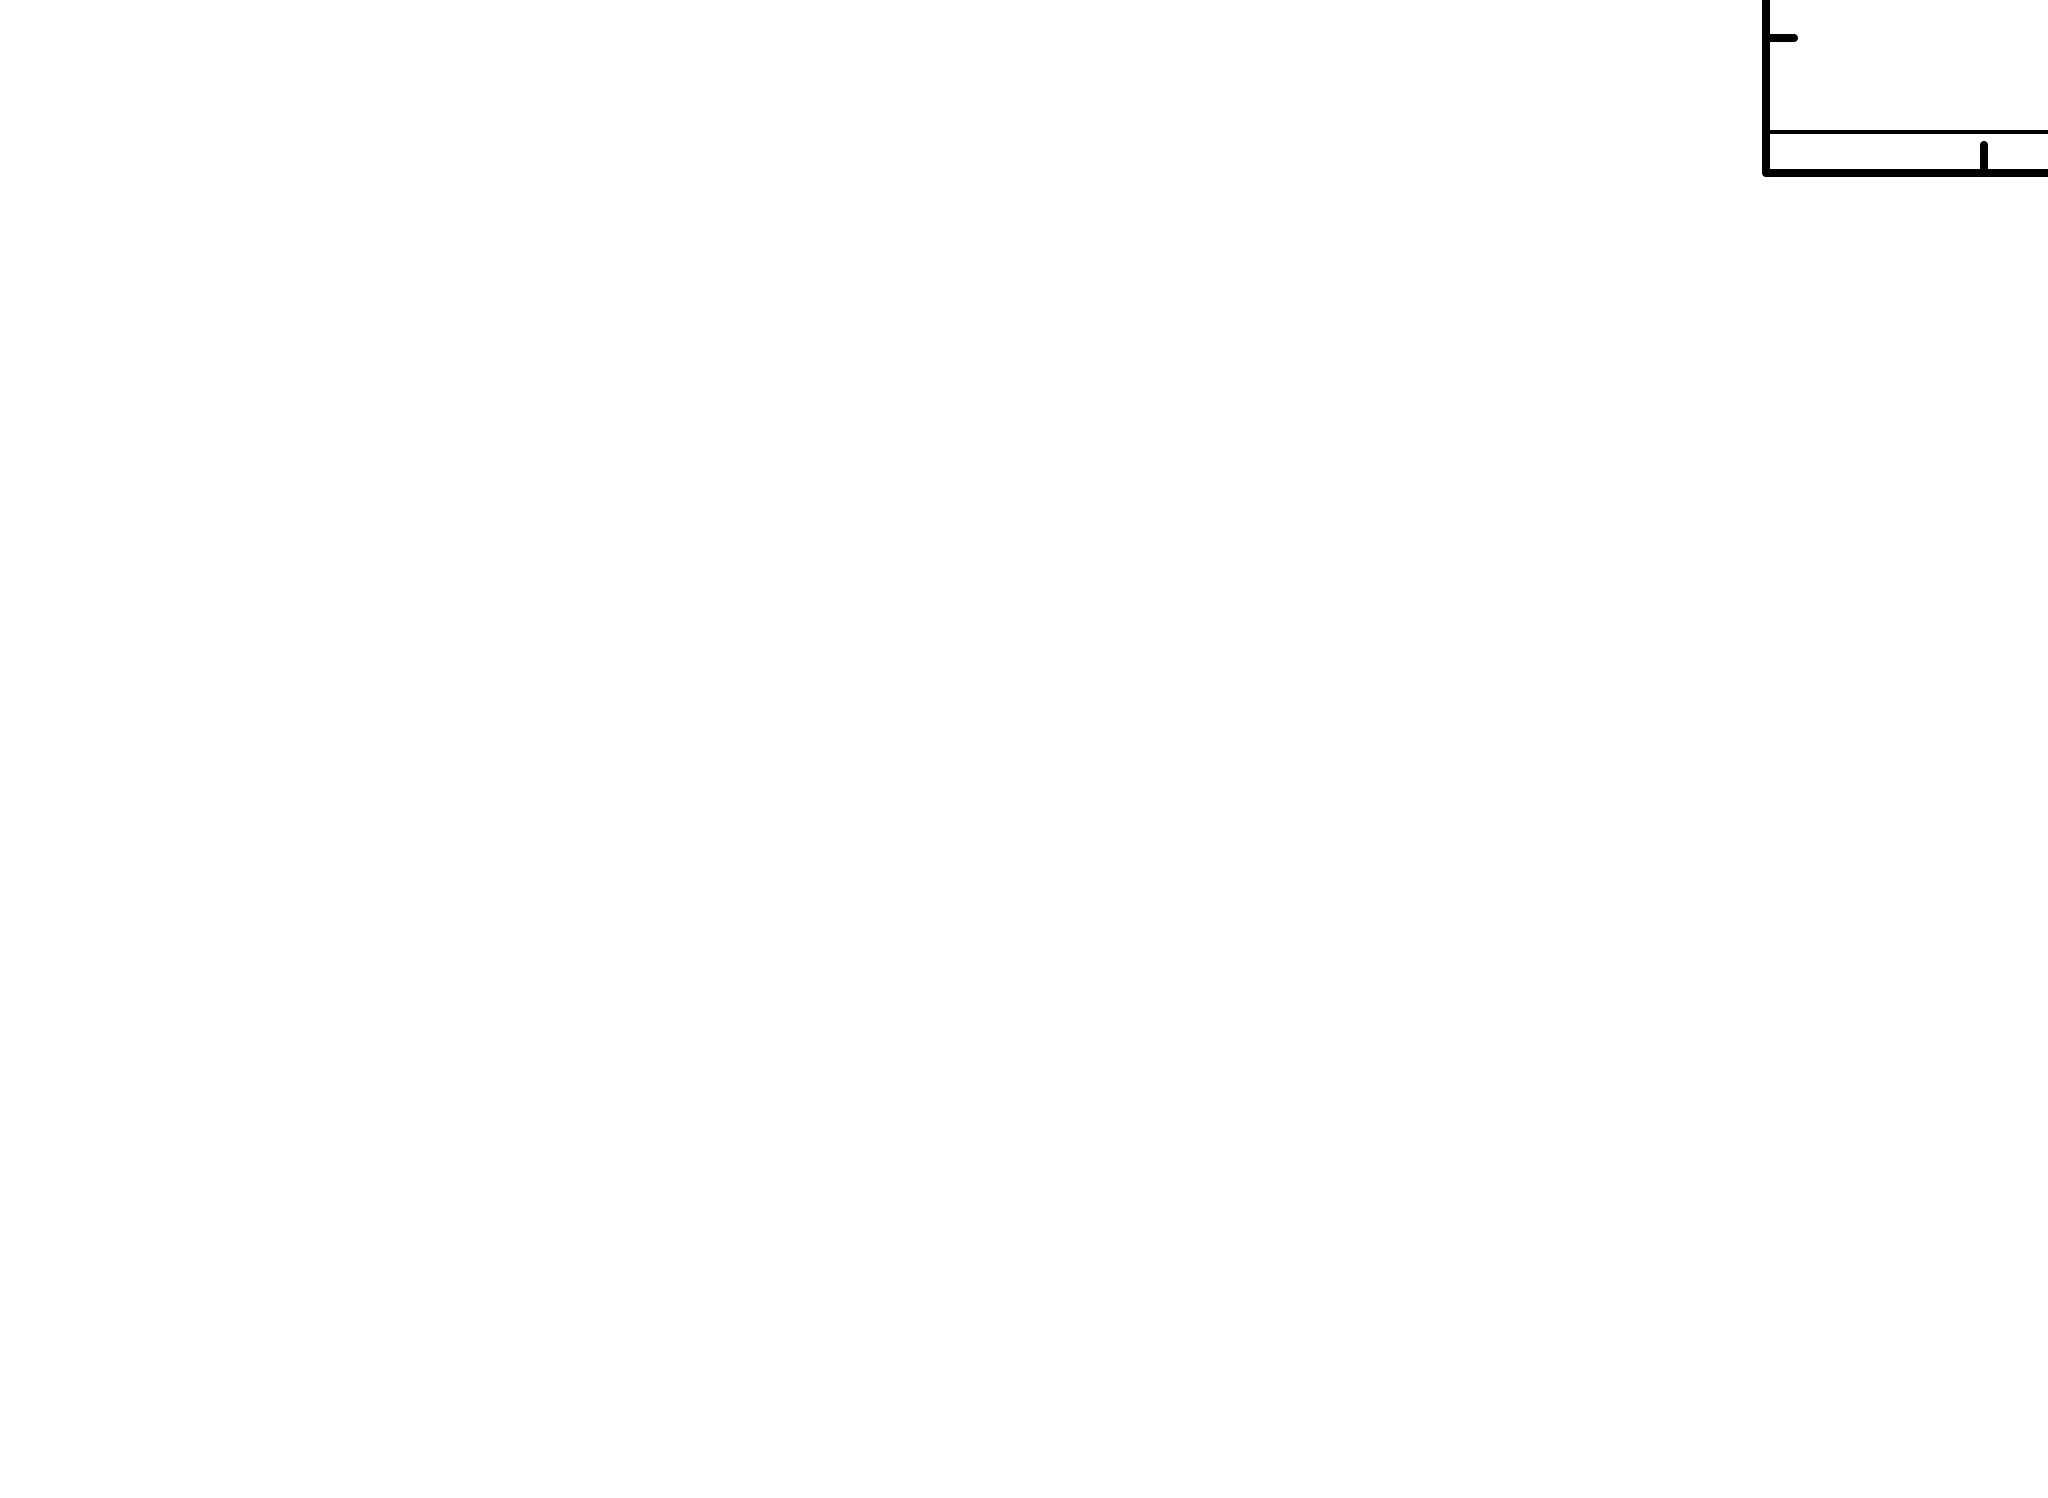

In [19]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.Abundanc = 0.3
mo.apec.Abundanc = 0.3
mo.apec.kT = 0.5
mo.apec_3.kT = 8.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(raymond<2> + raymond<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
   6    3   raymond    kT         keV      1.00000      +/-  0.0          
   7    3   raymond    Abundanc            1.00000      frozen
   8    3   raymond    Redshift            0.0          frozen
   9    3   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.263222e+10     using 8 bins.

Test statistic : Chi-Squared              1.263222e+10     using 8 bins.
 Null hypothesis probabi

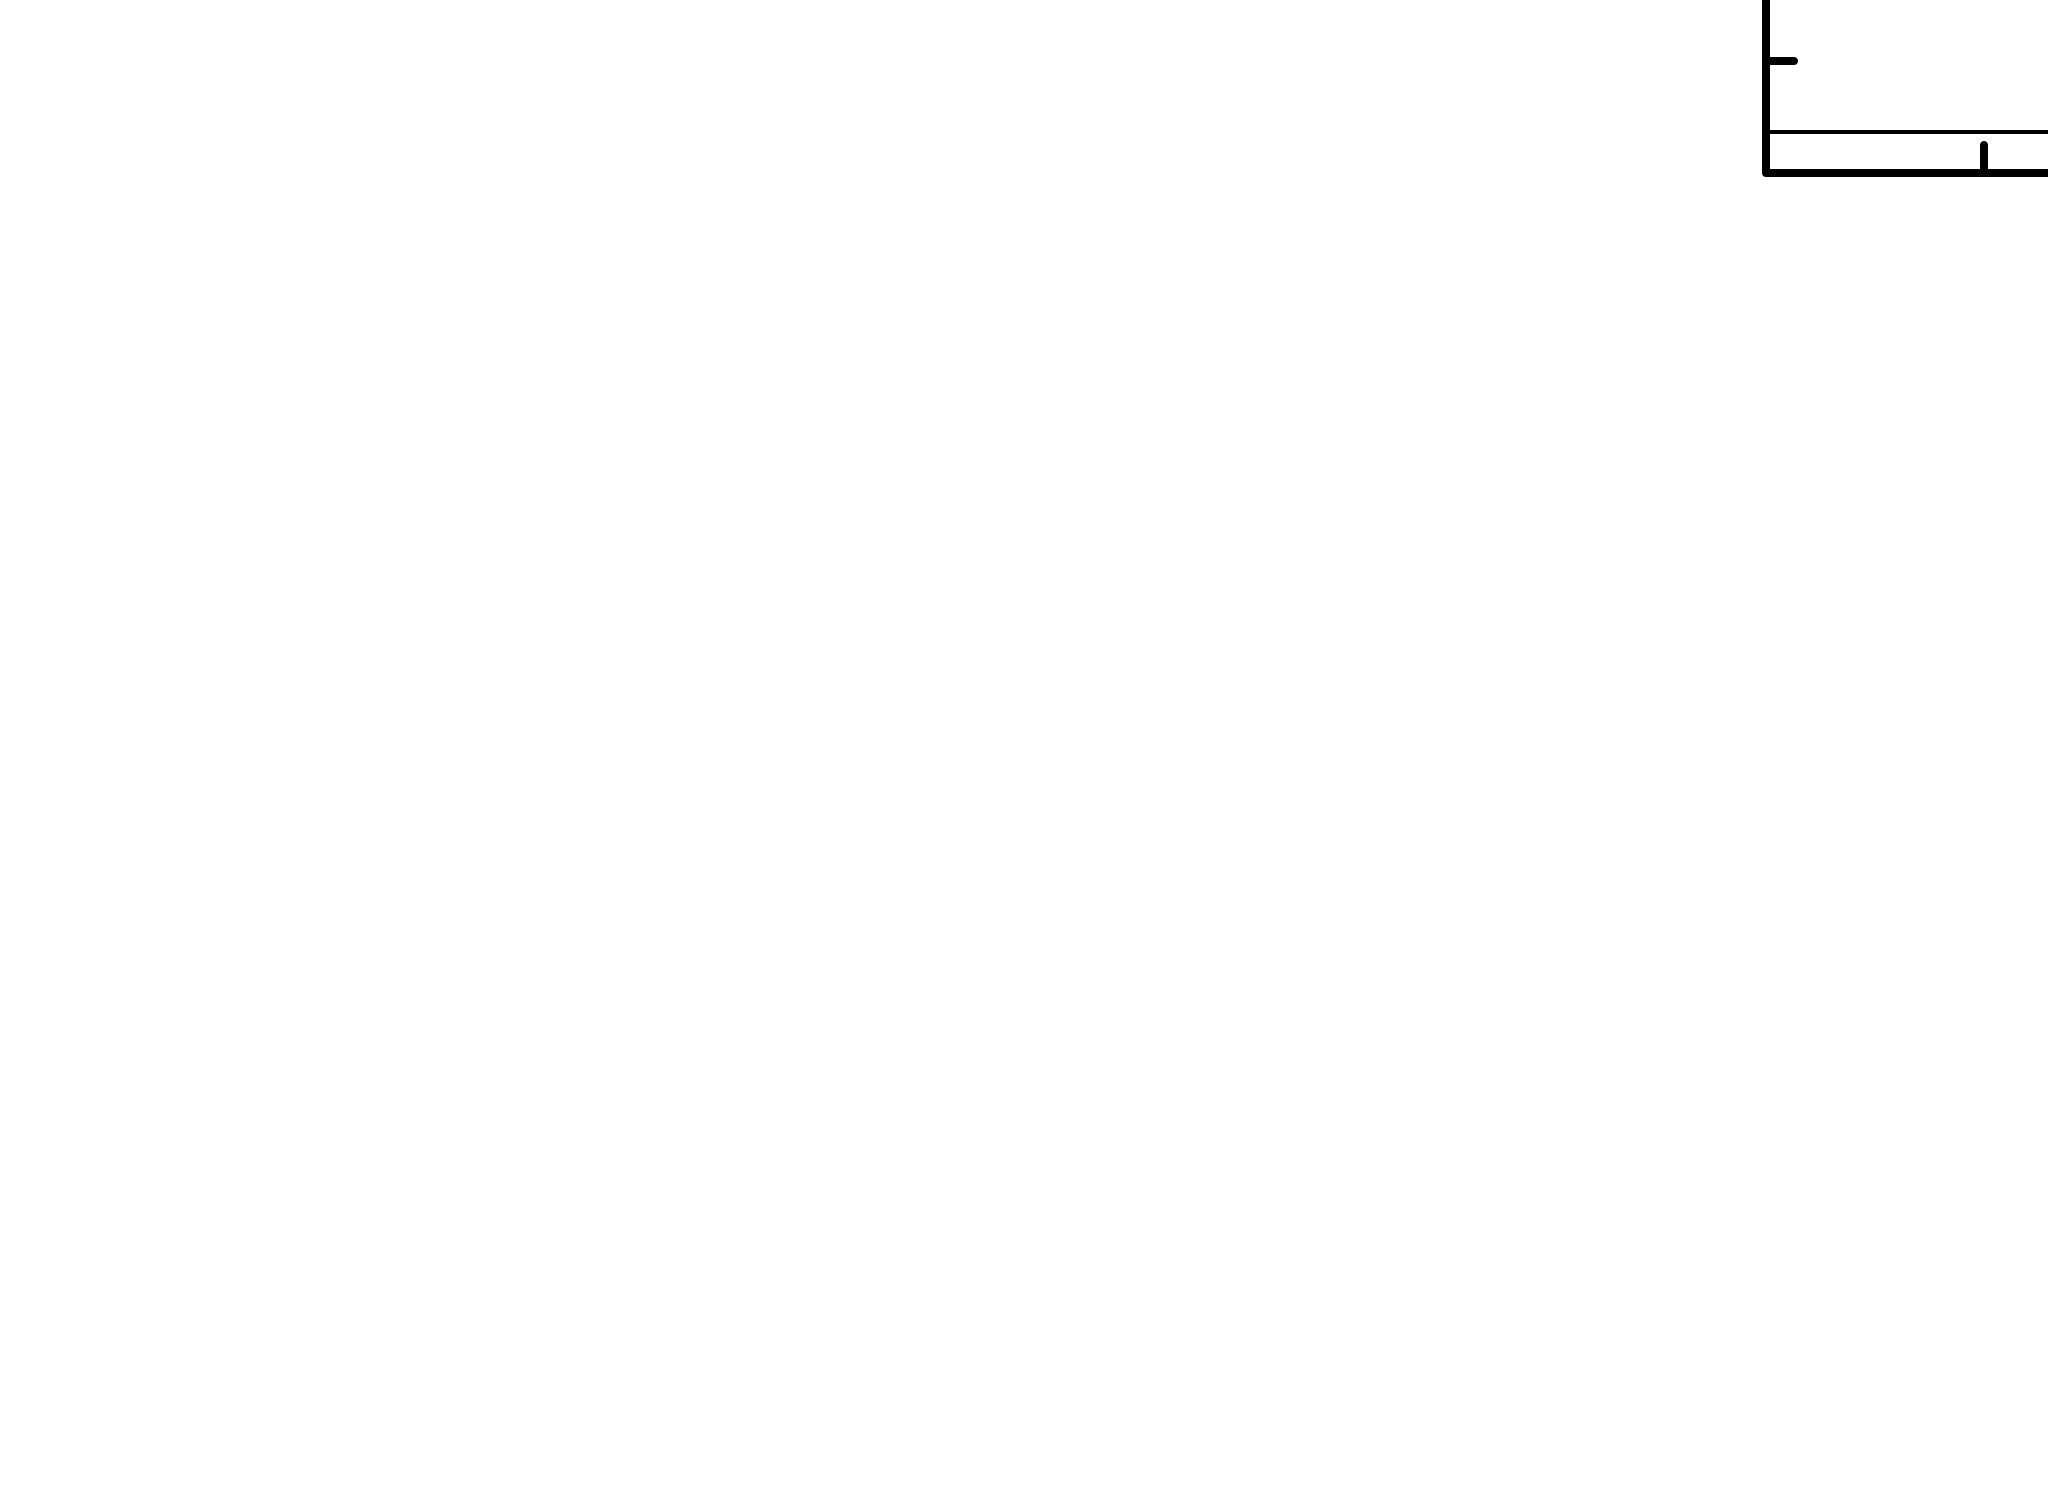

In [20]:
AllModels.clear()
mo = Model("tbabs*(raymond+raymond)")
mo.raymond.Abundanc = 0.3
mo.raymond_3.Abundanc = 0.3
mo.raymond_3.kT = 0.5
mo.raymond.kT = 8.0
Fit.perform()
Plot("data resid")